In [ ]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

# Define the strategy page URL
url = "https://www.myfxbook.com/strategies/copysignals/337097"

In [ ]:
def get_monthly(url):
    # Send a GET request to the strategy page URL
    response = requests.get(url)

    # Parse the HTML content of the page using BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")

    # Find the "table-scrollable-borderless" element
    table_element = soup.find("div", class_="table-scrollable-borderless")

    # Get the second child element of the "table-scrollable-borderless" element
    # print(table_element)
    # second_child = table_element.contents[1]
    #
    # # Print the contents of the second child element
    # print(second_child)
    # Find the "Monthly" span element within the "table-scrollable-borderless" element
    monthly_span = table_element.find(
        "span", string=lambda text: "monthly" in text.lower()
    )

    # Get the table cell element next to the "Monthly" span element
    monthly_td = monthly_span.find_next("td")

    # Print the text content of the monthly return value cell
    ret = monthly_td.text.split("%")[0]
    print(ret)
    return ret


def get_strategies(url):
    # Send a GET request to the strategy page URL
    response = requests.get(url)

    # Parse the HTML content of the page using BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")

    td_list = soup.find_all("td", class_="break-word min-width-100 width-30-percentage")

    # Print the href attribute value of each table cell element
    items = []
    for td in td_list:
        href = td.a.get("href")
        items.append(href)
    return items

In [ ]:
class Fetcher:
    def get_strategies(self):
        url = "https://www.myfxbook.com/strategies/all-strategies"
        lists = []
        lists.append(get_strategies(url))
        for page in range(1, 10):
            url = f"https://www.myfxbook.com/strategies/all-strategies/{page}"
            lists.append(get_strategies(url))

        strategies = []
        # Loop over each sublist in the input list and add its items to the target list
        for sublist in lists:
            strategies.extend(sublist)
        print(strategies)
        print(len(strategies))
        self.strategies = strategies

    def get_monthly(self):
        df = pd.Series()
        for strategy in self.strategies:
            df = pd.concat([df, pd.Series([get_monthly(strategy)])])
        print(df)
        df.to_csv("monthly.csv")

    def get_stats(self):
        df = pd.read_csv("monthly.csv")
        df.drop(df.columns[0], axis=1, inplace=True)
        df = df[df["0"] < 100]
        return df

    def print_stats(self):
        df = self.get_stats()

        print("The mean return is: ", df.mean()[0])
        print("The median return is: ", df.median()[0])
        return df

    def plot_stats(self):
        df = self.get_stats()
        df.plot.hist(bins=100)
        plt.show()

In [ ]:
fetcher = Fetcher()
fetcher.get_strategies()
fetcher.get_monthly()

The mean return is:  10.081034482758621
The median return is:  3.865


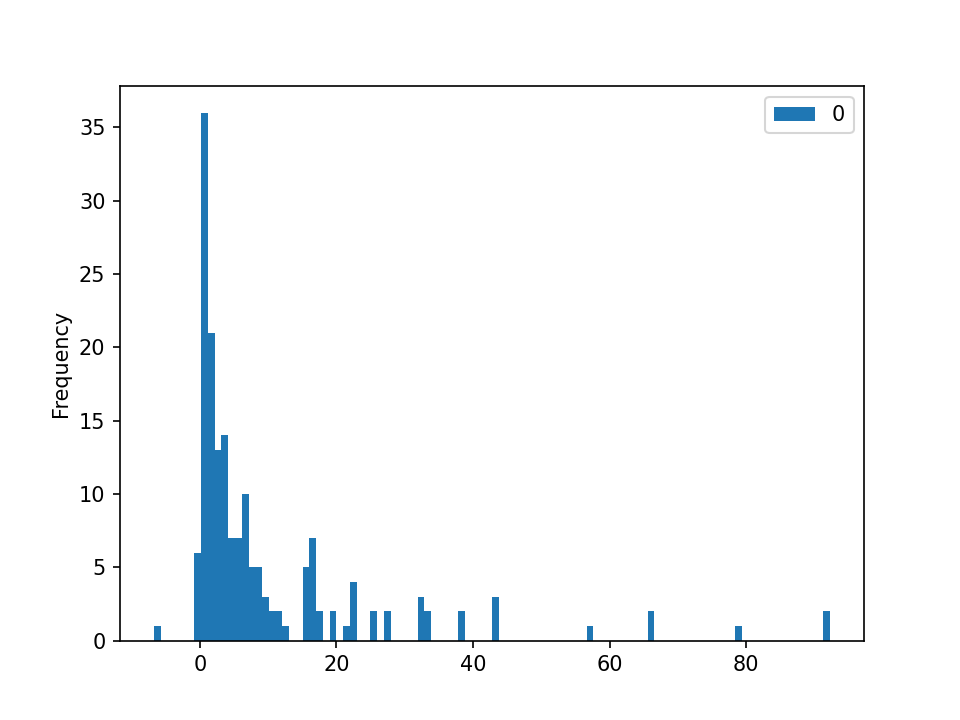

In [1]:
fetcher = Fetcher()
df = fetcher.print_stats()

fetcher.plot_stats()